# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia

---

## 01. Pyplot Visualization Example 3
### About this notebook

In this worksheet, we use a real dataset in the csv format to illustrate the use of `pandas` and `matplotlib` in visualization.

---

### Reading the dataset
Since the dataset is a .csv file, we use pandas to read the file and take a look to the first elements.

In [ ]:
path='' #Define an empty string to use in case of local working

In [ ]:
# Working with google colab needs to mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# we define the path to the files
path = '/content/drive/MyDrive/Colab Notebooks/CA2021/04. Visualization/presentation/04.pyplotExample04/'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv(path+'data.csv')

df.head()

,Name,z,sigma*,e_sigma*,n_sigma*,FWHM,e_FWHM,logL,e_logL,logM,E_logM,e_logM
0,SDSS J000805.62+145023.4,0.0454,140.0,27.0,NaN,7610.0,380.0,41.13,0.04,7.7,NaN,0.1
1,SDSS J004236.86-104921.8,0.0419,78.4,10.0,NaN,1960.0,97.0,41.58,0.14,6.7,NaN,0.1
2,SDSS J011703.58+000027.3,0.0456,98.8,16.0,NaN,2270.0,110.0,41.45,0.08,6.8,NaN,0.1
3,SDSS J020459.25-080816.0,0.0772,121.0,9.4,a,3720.0,180.0,41.13,0.05,7.0,NaN,0.1
4,SDSS J020615.99-001729.1,0.0426,216.0,30.0,NaN,3860.0,190.0,41.91,0.07,7.5,NaN,0.1


The `.describe()` attribute summarize the content of the dataset.

In [ ]:
df.describe()

,z,sigma*,e_sigma*,FWHM,e_FWHM,logL,e_logL,logM,E_logM,e_logM
count,88.000000,88.000000,88.000000,71.000000,71.000000,71.000000,71.000000,88.00000,15.000000,88.000000
mean,0.048665,117.142045,11.805682,3206.056338,210.760563,41.504225,0.078028,6.86625,0.140667,0.189886
std,0.032562,48.285108,5.308383,1759.679743,191.219953,0.663268,0.041700,0.72825,0.074303,0.172470
min,0.000947,30.000000,2.900000,810.000000,41.000000,40.100000,0.030000,4.90000,0.020000,0.020000
25%,0.027750,87.025000,7.750000,1905.000000,110.000000,41.155000,0.050000,6.30000,0.100000,0.100000
50%,0.042250,113.500000,12.000000,2970.000000,160.000000,41.510000,0.070000,7.00000,0.120000,0.100000
75%,0.062200,139.250000,15.000000,3870.000000,210.000000,41.860000,0.090000,7.40750,0.170000,0.200000
max,0.184000,268.000000,30.000000,8240.000000,1190.000000,43.610000,0.200000,8.52000,0.310000,1.060000


The dataframe includes data from 88 supermassive black holes. There can be seen the mean of the values, the standard deviation and the minimum and maximum values.

The columns correspond to

**z** : Redshift \
**sigma**\* : Stellar velocity dispersion \
**e_sigma**\* : Formal uncertainty in sigma* \
**FWHM** : H<sub>$\alpha$</sub> Full-Width at Half Maximum \
**e_FWHM** : Formal uncertainty in FWHM \
**logL** : $\log_{10}$ of H<sub>$\alpha$</sub> luminosity in erg/s \
**e_logL** : Formal uncertainty in logL \
**logM** : $\log_{10}$ of the Black Hole mass \
**E_logM** : Formal (upper limit) uncertainty in logM \
**e_logM** : Formal (lower limit) uncertainty in logM 

---

### Ploting the Data

It is possible to use `pyplot` to plot directly from the dataframe.

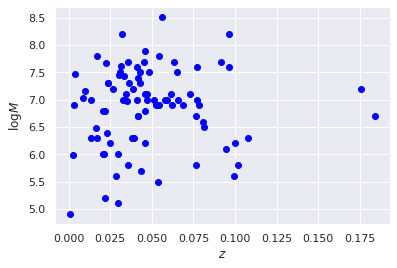

In [ ]:
plt.scatter(df['z'], df['logM'],  color='blue')
plt.xlabel(r'$z$')
plt.ylabel(r'$\log M$')
plt.show()

Now we show different combinations of the characteristics searching for some kind of patterns.

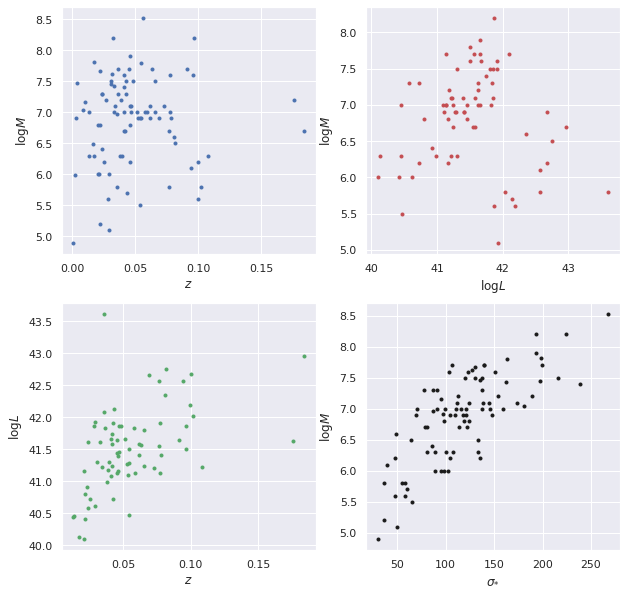

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.plot(df['z'], df['logM'], 'b.')
plt.xlabel(r'$z$')
plt.ylabel(r'$\log M$')

plt.subplot(222)
plt.plot(df['logL'], df['logM'], 'r.')
plt.xlabel(r'$\log L$')
plt.ylabel(r'$\log M$')

plt.subplot(223)
plt.plot(df['z'], df['logL'], 'g.')
plt.xlabel(r'$z$')
plt.ylabel(r'$\log L$')

plt.subplot(224)
plt.plot(df['sigma*'], df['logM'], 'k.')
plt.xlabel(r'$\sigma_{*}$')
plt.ylabel(r'$\log M$')

plt.show()

Note that using a `pandas` dataframe has a clear advantage because the absence of data for some points doesn't induce zero values as seen when using numpy arrays. In fact, looking at the $\log L$ data, we see the absence of information represented by a `NaN` tag.


In [ ]:
df['logL']

0     41.13
1     41.58
2     41.45
3     41.13
4     41.91
      ...  
83      NaN
84      NaN
85      NaN
86      NaN
87      NaN
Name: logL, Length: 88, dtype: float64

From the plots above we recognize the following patterns

- Two separate points (outcasts or anomalies) in the plot of $\log M$ vs $z$
- Two separate clusters in the plot of $\log M$ vs $\log L$
- Three outcast or anomalies in the plot of $\log L$ vs $z$
- An almost linear tendency in the plot of $\log M$ vs $\sigma_{*}$

---
### Scatter Matrix

An easiest way to plot multiple figures from the information in a dataframe is using the `pandas.plotting.scatter_matrix` function. It draws a matrix with scatter plots of all the combination of features in the dataframe. In the diagonal, it draws a histogram of each feature. Complete information at

https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html


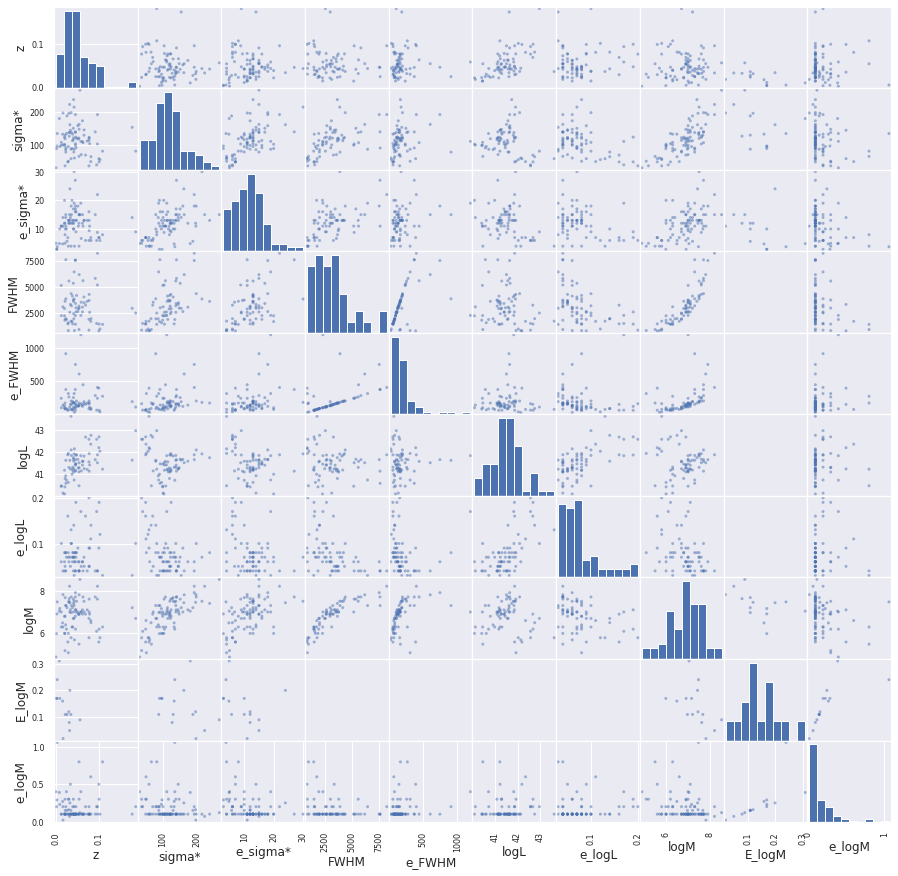

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(15,15))
plt.show()

We can also create a scatter matrix using only some of the features of the dataframe.

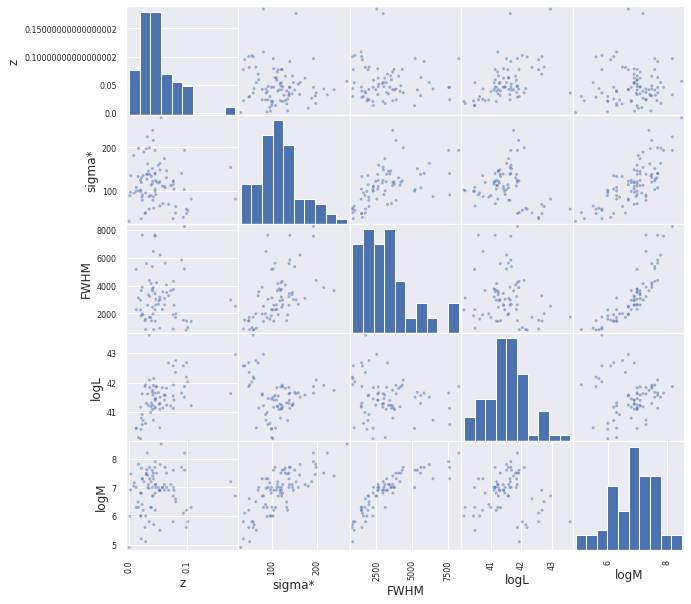

In [ ]:
attributes=['z', 'sigma*', 'FWHM', 'logL', 'logM']
pd.plotting.scatter_matrix(df[attributes], figsize=(10,10))
plt.show()

---
Now, we will look deep into the behavior of $\log M$ vs $\sigma_{*}$. We will introduce two columns to the dataframe with the logarithm of $\sigma_{*}$ and its error.

In [ ]:
df['log_sigma*'] = np.log10(df['sigma*'])
df['log_e_sigma*'] = np.log10(df['e_sigma*'])

df.head()

,Name,z,sigma*,e_sigma*,n_sigma*,FWHM,e_FWHM,logL,e_logL,logM,E_logM,e_logM,log_sigma*,log_e_sigma*
0,SDSS J000805.62+145023.4,0.0454,140.0,27.0,NaN,7610.0,380.0,41.13,0.04,7.7,NaN,0.1,2.146128,1.431364
1,SDSS J004236.86-104921.8,0.0419,78.4,10.0,NaN,1960.0,97.0,41.58,0.14,6.7,NaN,0.1,1.894316,1.000000
2,SDSS J011703.58+000027.3,0.0456,98.8,16.0,NaN,2270.0,110.0,41.45,0.08,6.8,NaN,0.1,1.994757,1.204120
3,SDSS J020459.25-080816.0,0.0772,121.0,9.4,a,3720.0,180.0,41.13,0.05,7.0,NaN,0.1,2.082785,0.973128
4,SDSS J020615.99-001729.1,0.0426,216.0,30.0,NaN,3860.0,190.0,41.91,0.07,7.5,NaN,0.1,2.334454,1.477121


Now we plot the data and error bars. 

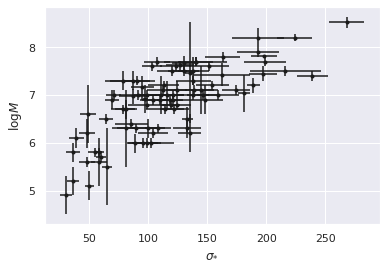

In [ ]:
plt.errorbar(df['sigma*'], df['logM'], df['e_logM'], df['e_sigma*'], fmt='k.')
plt.xlabel(r'$\sigma_{*}$')
plt.ylabel(r'$\log M$')
plt.show()

Or in log-log scale,

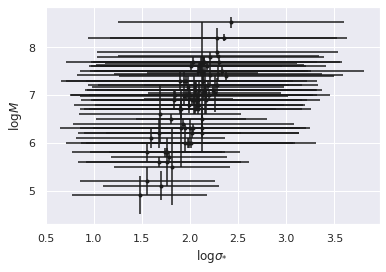

In [ ]:
plt.errorbar(df['log_sigma*'], df['logM'], df['e_logM'], df['log_e_sigma*'], fmt='k.')
plt.xlabel(r'$\log \sigma_{*}$')
plt.ylabel(r'$\log M$')
plt.show()